In [6]:
!pip install anomalib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.0/399.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=f06b9dccc9df8e0cd4bdc2892fd41f68d4eeb30671eb4cef6cca532a6af2403c
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [6]:
!pip install kornia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.7 MB/s eta 0:00:00


In [4]:
%pip install pytorch-lightning

In [2]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 60.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [11]:
!unzip -q "/content/drive/MyDrive/archive.zip"

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np
from anomalib import TaskType
from anomalib.data.image.mvtec import MVTec, MVTecDataset

In [15]:
import os

def process_images_in_folder(source_dir):
    image_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    for i, file_name in enumerate(image_files):
        full_path = os.path.join(source_dir, file_name)
        # Burada dosyaları işleyecek kodunuzu ekleyin. Örneğin:
        print(f"Processing {full_path}")  # Gerçek işlem yerine geçici bir yazdırma işlemi
        # full_manipulation.process_and_save_image(full_path, output_dir, i, "healthy")

source_root_dir = "/content/mvtech_anomaly_detection"
categories = ["hazelnut", "screw", "pill", "carpet"]
output_dir = "processed_images"

for category in categories:
    train_dir = os.path.join(source_root_dir, category, "train")
    if os.path.exists(train_dir):
        process_images_in_folder(train_dir)
    else:
        print(f"No train directory found for {category}")

In [18]:
random.seed(9)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

trnsfrm = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])


pretrain_path = '/kaggle/input/imagenetmini-1000/imagenet-mini/train'
data_path = '/content/mvtech_anomaly_detection'


#pretrain_dataset = ImageFolder(root=pretrain_path, transform=transform)
dataset = ImageFolder(root=data_path, transform=transform)

train_indices = random.sample(range(len(dataset)), int(0.8 * len(dataset)))
valid_indices = [x for x in range(len(dataset)) if x not in train_indices]


train_dataset = Subset(dataset, train_indices)
valid_dataset = Subset(dataset, valid_indices)

batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Teacher network

In [ ]:
class Teacher(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=4, stride=1, padding=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=1, padding=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=4, stride=1, padding=0)
        )

    def forward(self, x):
        x = self.features(x)
        return x


# Student network

In [ ]:
class Student(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=4, stride=1, padding=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=1, padding=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=768, kernel_size=4, stride=1, padding=0)
        )

    def forward(self, x):
        x = self.features(x)
        return x


# Autoencoder

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1)  # EncConv-1
        self.enc_conv2 = nn.Conv2d(32, 32, kernel_size=4, stride=2, padding=1)  # EncConv-2
        self.enc_conv3 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)  # EncConv-3
        self.enc_conv4 = nn.Conv2d(64, 64, kernel_size=4, stride=2, padding=1)  # EncConv-4
        self.enc_conv5 = nn.Conv2d(64, 64, kernel_size=4, stride=2, padding=1)  # EncConv-5
        self.enc_conv6 = nn.Conv2d(64, 64, kernel_size=8, stride=1, padding=0)  # EncConv-6

        # Decoder
        self.bilinear1 = nn.Upsample(scale_factor=3, mode='bilinear')  # Bilinear-1
        self.dec_conv1 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=2)  # DecConv-1
        self.dropout1 = nn.Dropout2d(p=0.2)  # Dropout-1

        self.bilinear2 = nn.Upsample(scale_factor=2, mode='bilinear')  # Bilinear-2
        self.dec_conv2 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=2)  # DecConv-2
        self.dropout2 = nn.Dropout2d(p=0.2)  # Dropout-2

        self.bilinear3 = nn.Upsample(scale_factor=2, mode='bilinear')  # Bilinear-3
        self.dec_conv3 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=2)  # DecConv-3
        self.dropout3 = nn.Dropout2d(p=0.2)  # Dropout-3

        self.bilinear4 = nn.Upsample(scale_factor=2, mode='bilinear')  # Bilinear-4
        self.dec_conv4 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=2)  # DecConv-4
        self.dropout4 = nn.Dropout2d(p=0.2)  # Dropout-4

        self.bilinear5 = nn.Upsample(scale_factor=2, mode='bilinear')  # Bilinear-5
        self.dec_conv5 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=2)  # DecConv-5
        self.dropout5 = nn.Dropout2d(p=0.2)  # Dropout-5

        self.bilinear6 = nn.Upsample(scale_factor=2, mode='bilinear')  # Bilinear-6
        self.dec_conv6 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=2)  # DecConv-6
        self.dropout6 = nn.Dropout2d(p=0.2)  # Dropout-6

        self.bilinear7 = nn.Upsample(scale_factor=0.5, mode='bilinear')  # Bilinear-7
        self.dec_conv7 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)  # DecConv-7
        self.dec_conv8 = nn.Conv2d(64, 384, kernel_size=3, stride=1, padding=1)  # DecConv-8

    def forward(self, x):
        # Encoder
        x = F.relu(self.enc_conv1(x))
        x = F.relu(self.enc_conv2(x))
        x = F.relu(self.enc_conv3(x))
        x = F.relu(self.enc_conv4(x))
        x = F.relu(self.enc_conv5(x))
        x = self.enc_conv6(x)

        # Decoder
        x = self.bilinear1(x)
        x = F.relu(self.dec_conv1(x))
        x = self.dropout1(x)

        x = self.bilinear2(x)
        x = F.relu(self.dec_conv2(x))
        x = self.dropout2(x)

        x = self.bilinear3(x)
        x = F.relu(self.dec_conv3(x))
        x = self.dropout3(x)

        x = self.bilinear4(x)
        x = F.relu(self.dec_conv4(x))
        x = self.dropout4(x)

        x = self.bilinear5(x)
        x = F.relu(self.dec_conv5(x))
        x = self.dropout5(x)

        x = self.bilinear6(x)
        x = F.relu(self.dec_conv6(x))
        x = self.dropout6(x)

        x = self.bilinear7(x)
        x = F.relu(self.dec_conv7(x))
        x = self.dec_conv8(x)

        return x


In [ ]:
teacher = Teacher()
teacher.load_state_dict(torch.load('/kaggle/input/new-teacher2/Teacher_model5000.pth', map_location=torch.device(device)))

for name, param in teacher.named_parameters():
    param.requires_grad = False

student = Student()

autenc = Autoencoder()


if torch.cuda.device_count() > 1:
    teacher = nn.DataParallel(teacher)
    student = nn.DataParallel(student)
    autenc = nn.DataParallel(autenc)

teacher = teacher.to(device)
student = student.to(device)
autenc = teacher.to(device)

In [ ]:
mu_channel = []
sig_channel = []

teacher.eval()
for i, (image, _) in enumerate(train_dataloader):

    image = image.to(device)

    with torch.no_grad():
        teach_out = teacher(image)

    if i==0:
        sequence = teach_out

    else:
        sequence = torch.cat((sequence, teach_out), dim=0)


sequence = sequence.mean(dim=0)

for tensr in sequence:
    mu_channel.append(tensr.mean().item())
    sig_channel.append(tensr.std().item())


teach_normalize = transforms.Normalize(mean=mu_channel, std=sig_channel)

In [ ]:
criterion = nn.MSELoss()
ts_crit = nn.MSELoss(reduction='none')

optimizer = torch.optim.Adam([{'params': student.parameters()}, {'params': autenc.parameters()}],
                             lr=1e-4,
                             weight_decay=1e-5)

In [ ]:
def augment_image(image, choice, L):
    if choice==1:
        img_transform = transforms.functional.adjust_brightness(image, L)
    elif choice==2:
        img_transform = transforms.functional.adjust_contrast(image, L)
    elif choice==3:
        img_transform = transforms.functional.adjust_saturation(image, L)

    return img_transform

In [ ]:
random.seed(9)

teacher.eval()
student.train()
autenc.train()

for epoch in range(10000):

    img_id = random.choice(train_indices)

    original_img = train_dataset[train_indices.index(img_id)][0]
    img = original_img.unsqueeze(0).to(device)


    with torch.no_grad():
        t1out = teacher(img)

    t1out = teach_normalize(t1out)

    s1out = student(img)

    s1out1 = s1out[:, :384, :, :]

    all_loss = ts_crit(s1out1.squeeze(0), t1out.squeeze(0)).mean(dim=-1).mean(dim=-1)
    phard = torch.kthvalue(all_loss, int(0.999 * all_loss.size(0)), dim=0).values
    mask = all_loss >= phard
    loss1 = all_loss[mask].mean()

    random_pt_image = pretrain_dataset[random.choice(range(len(pretrain_dataset)-1))][0]
    pretrain_out = student(random_pt_image.unsqueeze(0).to(device))
    penalty = torch.norm(pretrain_out)/(384*64*64)

    loss1 = loss1 + penalty



    aug_choice = random.choice([1, 2, 3])
    aug_coeff = random.uniform(0.8, 1.2)

    new_img = augment_image(original_img, aug_choice, aug_coeff)
    new_img = new_img.unsqueeze(0).to(device)


    with torch.no_grad():
        t2out = teacher(new_img)

    t2out = teach_normalize(t2out)

    s2out = student(new_img)
    s2out2 = s2out[:, 384:, :, :]

    aout = autenc(new_img)

    loss2 = criterion(t2out, aout)
    loss3 = criterion(aout, s2out2)

    loss = loss1 + loss2 + loss3

    if epoch==0 or (epoch+1)%500==0:
        print(f"Epoch: {epoch+1}; Loss: {loss.item()}")


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1; Loss: 17.990619659423828
Epoch: 500; Loss: 7.714209079742432
Epoch: 1000; Loss: 5.937117099761963
Epoch: 1500; Loss: 6.729617595672607
Epoch: 2000; Loss: 5.6337809562683105
Epoch: 2500; Loss: 4.981173515319824
Epoch: 3000; Loss: 5.952134609222412
Epoch: 3500; Loss: 5.35089111328125
Epoch: 4000; Loss: 4.860477924346924
Epoch: 4500; Loss: 4.9231977462768555
Epoch: 5000; Loss: 5.485560894012451
Epoch: 5500; Loss: 5.568210124969482
Epoch: 6000; Loss: 5.221377849578857
Epoch: 6500; Loss: 4.481130123138428
Epoch: 7000; Loss: 4.9017205238342285
Epoch: 7500; Loss: 4.692871570587158
Epoch: 8000; Loss: 4.302490234375
Epoch: 8500; Loss: 4.489889621734619
Epoch: 9000; Loss: 4.98230504989624
Epoch: 9500; Loss: 4.6589813232421875
Epoch: 10000; Loss: 4.669254302978516


In [ ]:
xst = []
xae = []

teacher.eval()
student.eval()
autenc.eval()

for i, (val1, _) in enumerate(valid_dataset):
    val1 = val1.unsqueeze(0).to(device)

    with torch.no_grad():
        tvout = teacher(val1)
        svout = student(val1)
        aeout = autenc(val1)

    tvout = teach_normalize(tvout)

    svout1 = svout[:, :384, :, :]
    svout2 = svout[:, 384:, :, :]

    dst = []
    for a1, b1 in zip(tvout[0], svout1[0]):
        dst.append(ts_crit(a1, b1))

    dst = torch.stack(dst)

    dstae = []
    for a2, b2 in zip(aeout[0], svout2[0]):
        dstae.append(ts_crit(a2, b2))

    dstae = torch.stack(dstae)

    mst = dst.sum(dim=0)/384
    mae = dstae.sum(dim=0)/384

    mst = F.interpolate(mst.unsqueeze(0).unsqueeze(0), size=(256, 256), mode='bilinear').squeeze(0)
    mae = F.interpolate(mae.unsqueeze(0).unsqueeze(0), size=(256, 256), mode='bilinear').squeeze(0)

    xst.append(mst)
    xae.append(mae)


xst = torch.stack(xst)
xae = torch.stack(xae)

In [ ]:
qast, qbst = np.percentile(xst.view(-1).cpu().numpy(), [90, 99.5])
qaae, qbae = np.percentile(xae.view(-1).cpu().numpy(), [90, 99.5])

In [ ]:
test_path = '/kaggle/input/metal-nut-ad/metal_nut/metal_nut/test'

test_dataset = ImageFolder(root=test_path)

In [ ]:
def get_mask(test_image):
    teacher.eval()
    student.eval()
    autenc.eval()

    with torch.no_grad():
        tvout = teacher(test_image)
        svout = student(test_image)
        aeout = autenc(test_image)

    tvout = teach_normalize(tvout)

    svout1 = svout[:, :384, :, :]
    svout2 = svout[:, 384:, :, :]

    dst = []
    for a1, b1 in zip(tvout[0], svout1[0]):
        dst.append(ts_crit(a1, b1))

    dst = torch.stack(dst)

    dstae = []
    for a2, b2 in zip(aeout[0], svout2[0]):
        dstae.append(ts_crit(a2, b2))

    dstae = torch.stack(dstae)

    mst = dst.sum(dim=0)/384
    mae = dstae.sum(dim=0)/384

    mst = F.interpolate(mst.unsqueeze(0).unsqueeze(0), size=(256, 256), mode='bilinear').squeeze(0)
    mae = F.interpolate(mae.unsqueeze(0).unsqueeze(0), size=(256, 256), mode='bilinear').squeeze(0)

    nmst = 0.1 * ((mst - qast)/(qbst - qast))
    nmae = 0.1 * ((mae - qaae)/(qbae - qaae))
    M = (0.5*nmst) + (0.5*nmae)
    mscore = torch.max(M.view(-1))

    return M, mscore

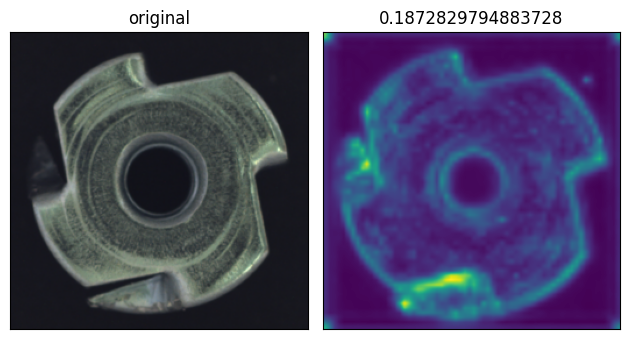

In [ ]:
import matplotlib.pyplot as plt

for timg, label in test_dataset:
    if label==0:
        for_mask = transform(timg).unsqueeze(0).to(device)
        orig_img = trnsfrm(timg)
        break

img_mask, mscore = get_mask(for_mask)

plt.subplot(1, 2, 1)
plt.imshow(orig_img.transpose(0,2))
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_mask.cpu().transpose(0,2))
plt.title(str(mscore.item()))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

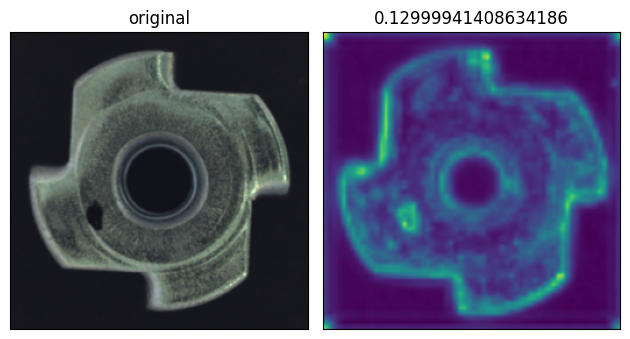

In [ ]:
for timg, label in test_dataset:
    if label==1:
        for_mask = transform(timg).unsqueeze(0).to(device)
        orig_img = trnsfrm(timg)
        break

img_mask, mscore = get_mask(for_mask)

plt.subplot(1, 2, 1)
plt.imshow(orig_img.transpose(0,2))
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_mask.cpu().transpose(0,2))
plt.title(str(mscore.item()))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

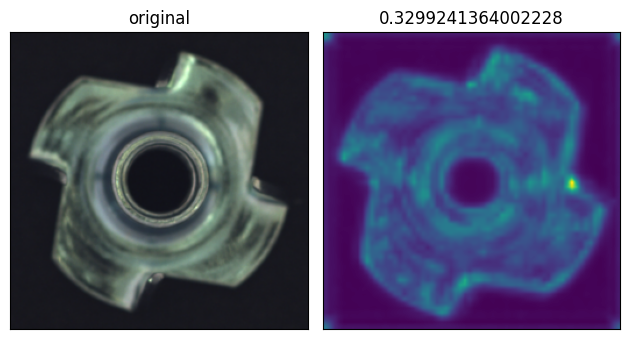

In [ ]:
for timg, label in test_dataset:
    if label==2:
        for_mask = transform(timg).unsqueeze(0).to(device)
        orig_img = trnsfrm(timg)
        break

img_mask, mscore = get_mask(for_mask)

plt.subplot(1, 2, 1)
plt.imshow(orig_img.transpose(0,2))
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_mask.cpu().transpose(0,2))
plt.title(str(mscore.item()))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

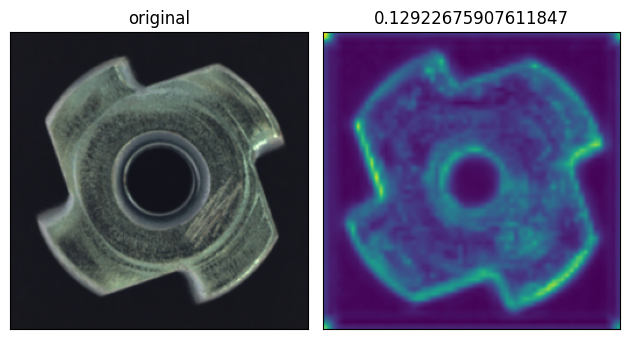

In [ ]:
for timg, label in test_dataset:
    if label==4:
        for_mask = transform(timg).unsqueeze(0).to(device)
        orig_img = trnsfrm(timg)
        break

img_mask, mscore = get_mask(for_mask)

plt.subplot(1, 2, 1)
plt.imshow(orig_img.transpose(0,2))
plt.title('original')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_mask.cpu().transpose(0,2))
plt.title(str(mscore.item()))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()